 dataset.shape ==  (245760, 1)
 dataset2.shape ==  (245760, 1)
length of train ==  245760
length of test ==  245760
length of Total ==  491520
 Lets start ~!!! go, go! 
Train on 245728 samples, validate on 245728 samples
Epoch 1/1
245728/245728 [==============================] - 518s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 1839.2027 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0902 - val_mean_absolute_percentage_error: 1964.8776
Train on 245728 samples, validate on 245728 samples
Epoch 1/1
245728/245728 [==============================] - 521s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 1858.4177 - val_loss: 0.0121 - val_mean_squared_error: 0.0121 - val_mean_absolute_error: 0.1051 - val_mean_absolute_percentage_error: 1906.0927
Train on 245728 samples, validate on 245728 samples
Epoch 1/1
245728/245728 [

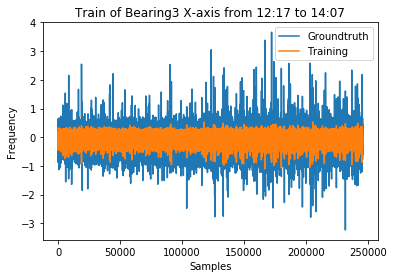

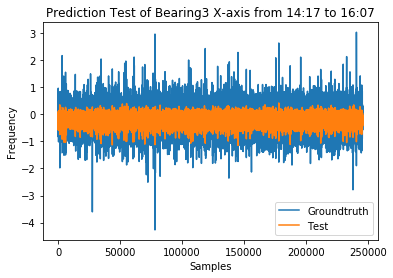

--------------------------------------------------------
 history.losses(mse)     ==  [0.001635372127757531, 0.0010866971931865735, 0.0010847332635388672, 0.0010811765881373883, 0.0010771994243532047, 0.001060059878030732, 0.0009429297562736374, 0.0008238902222519775, 0.0008011798803449679, 0.000740456250616884]
 history.val_losses(mse) ==  [0.009182581695740011, 0.012124847753044024, 0.012717680802571461, 0.013465102075893, 0.016026257762768132, 0.018564671720678272, 0.019915413923065773, 0.02070363683606408, 0.021776879162153224, 0.017698072857823918]
--------------------------------------------------------


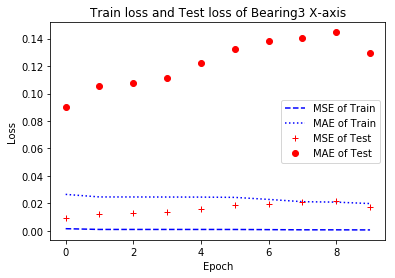

----------------------- The end of code ----------------


"\nplt.plot(history.losses, 'bo')  # Train losses = MSE \nplt.plot(history.val_losses, 'b') # Test losses = MSE \n## 아래 주의, x축은 epochs  \nplt.axis([0, epochs, 0.00, 0.04]) # y-end의 val_loss가 0.22를 넘지 않음.\n## x-start(0), x-end(에폭 수), y-start(0), y-and \nplt.title('Model Loss, MAE of Bearing3 X-axis from 14:17 to 16:07')\nplt.ylabel('Loss(Mean Squared Error)')\nplt.xlabel('Epoch')\n#plt.legend(['Train', 'Test'], loc=0)  #plt.plot(,,,label=)\nplt.legend(['Train', 'Test'])\nplt.savefig(title+'_MAE_Model_Loss.png')\n#plt.figure()  \nplt.show() \n\nplt.plot(history.mapes, 'bo') # Train MAPE\nplt.plot(history.val_mapes, 'b') # Test MAPE\n##### 아래 주의, x축은 epochs ### \nplt.axis([0, epochs, 0.00, 60000]) ### y-end의 val_loss가 30000를 넘지 않음.\n##### x-start(0), x-end(에폭 수), y-start(0), y-and #####\nplt.title('Prediction Loss(MAPE) of Bearing3 X-axis from 14:17 to 16:07')\nplt.ylabel('Loss(Mean Absolute Percentage Error)')\nplt.xlabel('Epoch')\n#plt.legend(['Train', 'Test'], loc=0)  #plt.plot(,,,labe

In [2]:
"""
Results of this code. 

C(64)–C(32)-BL(8)-BL(16)-L(32)-L(32)

Train Score: 0.19038 RMSE
Test Score: 0.91687 RMSE
--------------------------------------------------------
 history.losses      =  0.000740456250616884
 history.mses(=loss) =  0.000740456250616884
 history.maes        =  0.019929791589283683
 history.mapes       =  1722.0094469925873

 history.val_losses     =  0.017698072857823918
 history.val_mses(=loss)=  0.017698072857823918
 history.val_maes       =  0.12983843629280095
 history.val_mapes      =  1674.0147498968229
--------------------------------------------------------
"""                        
## 18년2월25일.일요일.오후5시20분. 1차 성공. 흑흑흑...
# 18년5월1일~6일. Conv 1D - bi-LSTM - LSTM 성공, 이후 최적화 
# 18년6월1일.금.오후9시.성공. validation 
# 18년6월2일.토.오후. 10sets/8column 중에 1column 추출 성공.  pandas.read_csv ( , ,usecols=[4] )
# 18년6월3일.일.오후7시.성공. loss/epoch graph, model.fit(, , , .. callbacks=[history])
# 18년6월6일.수. loss/epoch graph 일부 상세 수정
#  Timestep = 29,  (19는 Loss크다)
#  A Type code : User defined History Class 
#       class LossHistory(keras.callbacks.Callback):  #history = LossHistory()
#             def ... def ... 
#        model.fit( )  # # because of if loop for fit() 
#  B Type code : Default typed History Class 
#       compile 
#       history = model.fit( )
#       score = model.evaluate 
# Kwangsuk.Lee 
import numpy
import matplotlib.pyplot as plt
import pandas     
from pandas import read_csv
import math
import keras      
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, Flatten, Add, concatenate 
from keras.layers import Activation, BatchNormalization, regularizers, Dropout
from keras.layers import Conv1D, MaxPooling1D  # Addition 
from keras.layers import LSTM, Bidirectional # 추가 3. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error #Mean squared error regression loss
from sklearn.metrics import mean_absolute_error # Mean absolute error regression loss
# http://scikit-learn.org/stable/modules/classes.html 
#http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
# http://scikit-learn.org/stable/modules/classes.html
from sklearn.metrics import recall_score, precision_score # New 
from sklearn.metrics import f1_score #f1_score(y_true, y_pred[, labels, …])
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing  # New 
#from keras.layers import normalization ### 추가 keras.layers.normalization.BatchNormalization() 
#from keras.layers import Dropout  ### 추가 keras.layers.Dropout()


title = '180602_02_cnn_bilstm_lstm_' 
epochs = 10 
batch_size = 128  # 128  # 64, 128, do not 256, i.e. in case of 128, 1 epoch = 9minutes    
                   # 245759 - timestep 31 = 245728 / 112 = 0 
                   # In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 245728 samples 

class LossHistory(keras.callbacks.Callback):   #history = LossHistory()
    def init(self):         # history.init() 
        self.losses = []
        #self.accs = []
        self.val_losses = []
        #self.val_accs = []
        self.mses = []
        self.maes = []
        self.mapes = [] 
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []   
    
    def on_epoch_end(self, batch, logs={}): 
        self.losses.append(logs.get('loss'))
        #self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        #self.val_accs.append(logs.get('val_accuracy')) 
        self.mses.append(logs.get('mean_squared_error')) 
        self.maes.append(logs.get('mean_absolute_error')) 
        self.mapes.append(logs.get('mean_absolute_percentage_error')) 
        self.val_mses.append(logs.get('val_mean_squared_error')) 
        self.val_maes.append(logs.get('val_mean_absolute_error')) 
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))       
# end of the class 

# convert an array of values into a dataset matrix
def create_dataset(dataset, timesteps): #기존def create_dataset(dataset, timesteps=1): 여기서 -1삭제
    dataX, dataY = [], []
    for i in range(len(dataset)-timesteps-1):
        a = dataset[i:(i+timesteps), 0]
        dataX.append(a)
        dataY.append(dataset[i + timesteps, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility 
numpy.random.seed() 

# load the dataset
t = '00_Train_2003.11.25.12.17_14.07_12sets.csv' # 12sets 
dataframe = pandas.read_csv(t, header=None, sep='	', usecols=[4], engine='python')  
dataset = dataframe.values  # 여기는 항상 t 시점
dataset = dataset.astype('float32')
print(' dataset.shape == ', dataset.shape)

t1 = '00_Test_2003.11.25.14.17_16.07_12sets.csv' # 12sets 
dataframe2 = pandas.read_csv(t1, header=None, sep='	', usecols=[4], engine='python')
dataset2 = dataframe2.values  # Prediction Target(label) Data
dataset2 = dataset2.astype('float32')
print(' dataset2.shape == ', dataset2.shape)

# normalize the dataset ---------------- # 18.2.25. 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

scaler2 = MinMaxScaler(feature_range=(0, 1)) # New 18.3.16.금.14시34분
dataset2 = scaler2.fit_transform(dataset2)

# split into train and test sets ----------------
train_size = int(len(dataset)) # train 102400/5(batch_size)=  ,102396 ->102380   
test_size = int(len(dataset2)) # test 20480/5(batch_size)=   ,20478
train = dataset[0:train_size,:] 
test = dataset2[0:test_size,:]
print('length of train == ', int(len(dataset)))
print('length of test == ', int(len(dataset2))) 
print('length of Total == ', int(len(dataset))+int(len(dataset2))) 
print(' Lets start ~!!! go, go! ') 

# reshape into X=t and Y=t+1
features = 1 
timesteps = 31 # 31(32), timesteps=lookback은 한 스텝을 예측 

trainX, trainY = create_dataset(train, timesteps)
testX, testY = create_dataset(test, timesteps)
# reshape input to be [samples, time steps, features] 타임스텝이란 하나의 샘플에 포함된 시퀀스 갯수
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
######################################### with K.tf.device('/gpu:0'):  => GPU usage
import keras.backend.tensorflow_backend as K 
with K.tf.device('/gpu:0'):
    
    input_1 = Input(shape=(timesteps, features))  # timesteps , 1  (batch = 128)
    
    conv_11 = Conv1D(filters=32, kernel_size=1, strides=1, activation='relu')(input_1)
    conv_12 = Conv1D(filters=64, kernel_size=1, strides=1, activation='relu')(conv_11)
    
    ls_11 = (Bidirectional(LSTM(8, return_sequences=True)))(conv_12) 
    ls_12 = (Bidirectional(LSTM(16, return_sequences=True)))(ls_11) 
    
    ls_13 = (LSTM(32, return_sequences=True))(ls_12) 
    ls_14 = (LSTM(32))(ls_13) 
    
    dense_11 = Dense(8, activation='relu')(ls_14)
    output_1 = Dense(1, activation='relu')(dense_11)
    model = Model(inputs=[input_1], outputs=[output_1]) # multi-input, multi-output 
    
    model.compile(loss='mean_squared_error', optimizer='adam',
                  metrics=['mse', 'mae', 'mape'])  
    
    epochs=epochs    # Above grobal variable  
    
    history = LossHistory() # because of if loop for fit() 
    history.init()          # because of if loop for fit()
    
    for i in range(epochs):
        model.fit(trainX, trainY, epochs=1, batch_size=batch_size,
                  shuffle=False, validation_data=(testX, testY), 
                  callbacks=[history])
        model.reset_states() # shuffle=False 순서대로 출력의미, LSTM레이어가 여럿일때는 fit(return_sequence=True) 

# make predictions
print(' Start Prediction ... ')   
print(' Train X_1 (bearing 3 x)  Predicting...') 
trainPredict = model.predict(trainX, batch_size=batch_size, verbose = 1)
model.reset_states()
print(' Test X_1 (bearing 3 x) Predicting...') 
testPredict = model.predict(testX, batch_size=batch_size, verbose = 1)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict) #scaler2 
testY = scaler.inverse_transform([testY]) #scaler2 

# calculate root mean squared error 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.5f RMSE' % (trainScore))  ## 1-RMSE = Accuracy %  
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.5f RMSE' % (testScore))  ## 1-RMSE = Accuracy %  
print('--------------------------------------------------------') 
print(' history.losses      = ', history.losses) # loss == mse 
print(' history.mses(=loss) = ', history.mses)  # loss == mse 
print(' history.maes        = ', history.maes)
print(' history.mapes       = ', history.mapes)
print(' history.val_losses     = ', history.val_losses)  # loss == mse 
print(' history.val_mses(=loss)= ', history.val_mses) # loss == mse 
print(' history.val_maes       = ', history.val_maes)
print(' history.val_mapes      = ', history.val_mapes)
print('--------------------------------------------------------')      
# ---------------------------------
# print to # Layer, Shape, Parameter 
print('model summary ... ', model.summary())  # keras.models.model()
# ---------------------------------
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[timesteps:len(trainPredict)+timesteps, :] = trainPredict
# shift test predictions for plotting ... NEW
testPredictPlot = numpy.empty_like(dataset2)
testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(trainPredict)+(timesteps*2)+1:len(dataset2)-1, :] = testPredict
testPredictPlot[timesteps:len(testPredict)+timesteps, :] = testPredict
# ---------------------------------
plt.plot(scaler.inverse_transform(dataset), label='Groundtruth')
plt.plot(trainPredictPlot, label='Training')
plt.title('Train of Bearing3 X-axis from 12:17 to 14:07') 
plt.ylabel('Frequency')
plt.xlabel('Samples')
plt.legend() ## plt.plot(,label='')
plt.savefig(title+'_Train_groundtruth.png') ###### 수정 
plt.show()
# ---------------------------------
plt.plot(scaler2.inverse_transform(dataset2), label='Groundtruth')
#plt.plot(trainPredictPlot) 불필요, 아래 test display
plt.plot(testPredictPlot, label='Test')
plt.title('Prediction Test of Bearing3 X-axis from 14:17 to 16:07') 
plt.ylabel('Frequency')
plt.xlabel('Samples')
plt.legend() ## plt.plot(,label='')
plt.savefig(title+'_Test_groundtruth.png')  ###### 수정 
plt.show()
print('--------------------------------------------------------')  
print(' history.losses(mse)     == ', history.losses) 
print(' history.val_losses(mse) == ', history.val_losses)
print('--------------------------------------------------------') 
plt.plot(history.mses, 'b--', label='MSE of Train') # Train 0.000x소수점단위
plt.plot(history.maes, 'b:', label='MAE of Train') # Train 0.000x소수점단위
plt.plot(history.val_mses, 'r+', label='MSE of Test') # Test 0.000x 소수점단위
plt.plot(history.val_maes, 'ro', label='MAE of Test') # Test 0.000x 소수점단위 
plt.title('Train loss and Test loss of Bearing3 X-axis') 
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend() ## plt.plot(,label='')
plt.savefig(title+'_mse_mae.png') ###### 수정 
plt.show()
print('----------------------- The end of code ----------------') 
"""
plt.plot(history.losses, 'bo')  # Train losses = MSE 
plt.plot(history.val_losses, 'b') # Test losses = MSE 
## 아래 주의, x축은 epochs  
plt.axis([0, epochs, 0.00, 0.04]) # y-end의 val_loss가 0.22를 넘지 않음.
## x-start(0), x-end(에폭 수), y-start(0), y-and 
plt.title('Model Loss, MAE of Bearing3 X-axis from 14:17 to 16:07')
plt.ylabel('Loss(Mean Squared Error)')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc=0)  #plt.plot(,,,label=)
plt.legend(['Train', 'Test'])
plt.savefig(title+'_MAE_Model_Loss.png')
#plt.figure()  
plt.show() 

plt.plot(history.mapes, 'bo') # Train MAPE
plt.plot(history.val_mapes, 'b') # Test MAPE
##### 아래 주의, x축은 epochs ### 
plt.axis([0, epochs, 0.00, 60000]) ### y-end의 val_loss가 30000를 넘지 않음.
##### x-start(0), x-end(에폭 수), y-start(0), y-and #####
plt.title('Prediction Loss(MAPE) of Bearing3 X-axis from 14:17 to 16:07')
plt.ylabel('Loss(Mean Absolute Percentage Error)')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc=0)  #plt.plot(,,,label=)
plt.legend(['Train', 'Test'])
plt.savefig(title+'_MAPE_Predict_Loss.png')
#plt.figure() ## 
plt.show() 

plt.plot(history.mses, label='MSE of Train') # Train 0.000x소수점단위
plt.plot(history.maes, label='MAE of Train') # Train 0.000x소수점단위
#plt.plot(history.mapes, label='mean_absolute_percentage_erro') # 1000~2000단위, 출력만 제외 
# 아래 주의, x축은 epochs # 
plt.axis([0, epochs, 0.000, 0.040]) ### y-end의 val_loss가 0.025를 넘지 않음.
##### x-start(0), x-end(에폭 수), y-start(0), y-and #####
plt.title('Train Loss of Bearing3 X-axis from 12:17 to 14:07') 
plt.ylabel('Train Loss')
plt.xlabel('Train Epoch')
plt.legend() ## plt.plot(,label='')
plt.savefig(title+'_Train_Loss.png') ###### 수정 
plt.show()

plt.plot(history.val_mses, label='Test_MSE') # Test 0.000x 소수점단위
plt.plot(history.val_maes, label='Test_MAE') # Test 0.000x 소수점단위 
#plt.plot(history.val_mapes, label='validation_MAPE') # 1000~2000단위, 출력만 제외 
##### 아래 주의, x축은 epochs ### 
plt.axis([0, epochs, 0.00, 0.28]) ### y-end의 val_loss가 0.14를 넘지 않음.
##### x-start(0), x-end(에폭 수), y-start(0), y-and #####
plt.title('Prediction Test Loss of Bearing3 X-axis from 14:17 to 16:07') 
plt.ylabel('Test Loss')
plt.xlabel('Test Epoch')
plt.legend() ## plt.plot(,label='')
plt.savefig(title+'_Test_Loss.png') ###### 수정 
plt.show()

series1 = dataframe #dataframe = pandas.read_csv(t, header=None, sep='	', usecols=[4], engine='python')
series1.plot(kind='kde') # ‘kde’ : Kernel Density Estimation plot, ‘line’ : line plot (default) 
plt.title('Density Plots of Train Dataset(Bearing3 X-axis from 12:17 to 14:07)') 
plt.savefig(title+'_dataset_DensityPlots.png') 
plt.show()

series2 = dataframe2 #dataframe2 = pandas.read_csv(t1, header=None, sep='	', usecols=[4], engine='python')
series2.plot(kind='kde') # ‘kde’ : Kernel Density Estimation plot, ‘line’ : line plot (default) 
plt.title('Density Plots of Test Dataset(Bearing3 X-axis from 14:17 to 16:07)') 
plt.savefig(title+'_dataset2_DensityPlots.png') 
plt.show()

# box and whisker plot
# from pandas import DataFrame
df_dataset = pandas.DataFrame(dataset) #Train dataset
df_dataset.boxplot() 
plt.savefig(title+'_boxplot_dataset.png') 
plt.show() 
print('------- df_dataset.describe() -------')
print(df_dataset.describe())

df_trainPredictPlot = pandas.DataFrame(trainPredictPlot)
df_trainPredictPlot.boxplot()  
plt.savefig(title+'_boxplot_trainpredict.png') 
plt.show() 
print('------- df_trainPredictPlot.describe() -------')
print(df_trainPredictPlot.describe())

# box and whisker plot
# from pandas import DataFrame
df_dataset2 = pandas.DataFrame(dataset2) #Test dataset
df_dataset2.boxplot() 
plt.savefig(title+'_boxplot_dataset2.png') 
plt.show() 
print('------- df_dataset2.describe() -------')
print(df_dataset2.describe())

df_testPredictPlot = pandas.DataFrame(testPredictPlot)
df_testPredictPlot.boxplot()  # aa.boxplot()에서 aa는 dataframe 타입 
plt.savefig(title+'_boxplot_test_predict.png') 
plt.show() 
print('------- df_testPredictPlot.describe() -------')
print(df_testPredictPlot.describe())
"""
# end of code